In [141]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from scipy import stats


In [142]:
seifa_data = pd.read_excel("data/2033055001 - lga indexes.xls", sheet_name="Table 1")

#The ABS [explains](https://www.abs.gov.au/ausstats/abs@.nsf/Lookup/by%20Subject/2033.0.55.001~2016~Main%20Features~How%20to%20Use%20SEIFA~13) that the index scores are ordinal and mostly useful for more distributive analyses, so we can use decile instead.

seifa_data.xs(4)[3] = seifa_data.xs(3)[2] + " (Decile)"
seifa_data.xs(4)[5] = seifa_data.xs(3)[4] + " (Decile)"
seifa_data.xs(4)[7] = seifa_data.xs(3)[6] + " (Decile)"
seifa_data.xs(4)[9] = seifa_data.xs(3)[8] + " (Decile)"
seifa_data.xs(4)[0] = "lgaCode"
seifa_data.xs(4)[10] = seifa_data.xs(3)[10]
seifa_data.columns = seifa_data.loc[4]
seifa_data = seifa_data[5:]

In [143]:
restaurant_data = pd.read_json("data/lgaStoreSummary.json")

In [144]:
joined_data = pd.merge(seifa_data, restaurant_data, on="lgaCode")

In [145]:
joined_data = joined_data.drop([joined_data.index[318]]) #doesn't have a seifa indexes, and has a small population, so it is an outlier and will confuse the analysis

In [146]:
data_with_stores = joined_data[joined_data["stores"] != 0]
joined_data["stores per population"] = data_with_stores["stores"] / data_with_stores["Usual Resident Population"]

In [147]:
joined_data["Index of Relative Socio-economic Disadvantage (Decile)"] = joined_data["Index of Relative Socio-economic Disadvantage (Decile)"].replace("-", np.nan)
joined_data["Index of Relative Socio-economic Advantage and Disadvantage (Decile)"] = joined_data["Index of Relative Socio-economic Advantage and Disadvantage (Decile)"].replace("-", np.nan)
joined_data["Index of Economic Resources (Decile)"] = joined_data["Index of Economic Resources (Decile)"].replace("-", np.nan)
joined_data["Index of Education and Occupation (Decile)"] = joined_data["Index of Education and Occupation (Decile)"].replace("-", np.nan)

In [148]:
joined_data = joined_data.replace(np.nan, 0)

<Figure size 3600x2160 with 0 Axes>

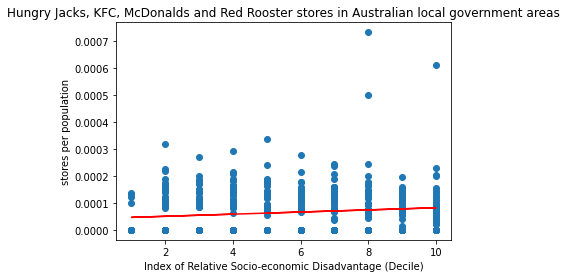

<Figure size 3600x2160 with 0 Axes>

In [149]:
x = joined_data["Index of Relative Socio-economic Disadvantage (Decile)"]
y = joined_data["stores per population"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
chart = plt
chart.plot(x, y, 'o', label='original data')
chart.plot(x, intercept + slope*x, 'r', label='fitted line')
chart.title("Hungry Jacks, KFC, McDonalds and Red Rooster stores in Australian local government areas")
chart.axes().set_xlabel("Index of Relative Socio-economic Disadvantage (Decile)")
chart.axes().set_ylabel("stores per population")
chart.figure(figsize=(50,30))

In [150]:
print("correlation coefficient: ", r_value)
print("gradient: ", slope)

correlation coefficient:  0.1370776691196595
gradient:  3.935618837875367e-06


Text(0, 0.5, 'stores per population')

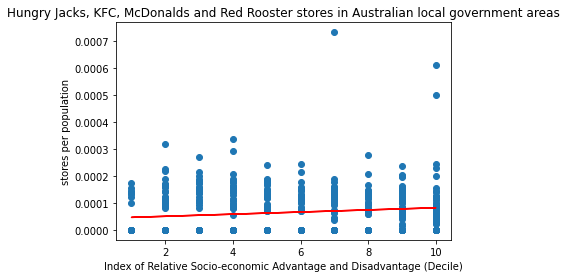

In [151]:
x = joined_data["Index of Relative Socio-economic Advantage and Disadvantage (Decile)"]
y = joined_data["stores per population"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
chart = plt
chart.plot(x, y, 'o', label='original data')
chart.plot(x, intercept + slope*x, 'r', label='fitted line')
chart.title("Hungry Jacks, KFC, McDonalds and Red Rooster stores in Australian local government areas")
chart.axes().set_xlabel("Index of Relative Socio-economic Advantage and Disadvantage (Decile)")
chart.axes().set_ylabel("stores per population")

In [152]:
print("correlation coefficient: ", r_value)
print("gradient: ", slope)

correlation coefficient:  0.1371474776631927
gradient:  3.937623101740797e-06


Text(0, 0.5, 'stores per population')

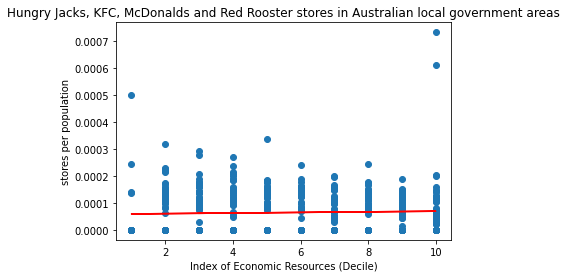

In [153]:
x = joined_data["Index of Economic Resources (Decile)"]
y = joined_data["stores per population"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
chart = plt
chart.plot(x, y, 'o', label='original data')
chart.plot(x, intercept + slope*x, 'r', label='fitted line')
chart.title("Hungry Jacks, KFC, McDonalds and Red Rooster stores in Australian local government areas")
chart.axes().set_xlabel("Index of Economic Resources (Decile)")
chart.axes().set_ylabel("stores per population")

In [154]:
print("correlation coefficient: ", r_value)
print("gradient: ", slope)

correlation coefficient:  0.038479127098497136
gradient:  1.106257825462153e-06


Text(0, 0.5, 'stores per population')

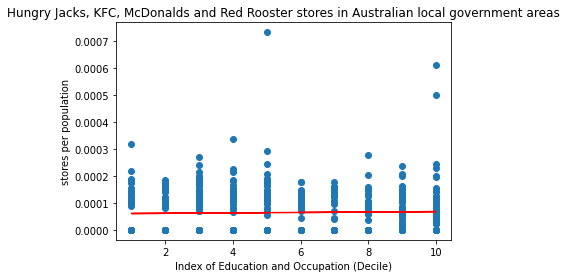

In [155]:
x = joined_data["Index of Education and Occupation (Decile)"]
y = joined_data["stores per population"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
chart = plt
chart.plot(x, y, 'o', label='original data')
chart.plot(x, intercept + slope*x, 'r', label='fitted line')
chart.title("Hungry Jacks, KFC, McDonalds and Red Rooster stores in Australian local government areas")
chart.axes().set_xlabel("Index of Education and Occupation (Decile)")
chart.axes().set_ylabel("stores per population")

In [156]:
print("correlation coefficient: ", r_value)
print("gradient: ", slope)

correlation coefficient:  0.026738082634675493
gradient:  7.68706583813249e-07


In [157]:
#It will be interesting to see what the data looks like with areas without any stores removed
#It becomes more intuitive to show population per store
data_with_stores = joined_data[joined_data["stores"] != 0]
data_with_stores["population per store"] = data_with_stores["Usual Resident Population"] / data_with_stores["stores"]

Text(0, 0.5, 'population per store')

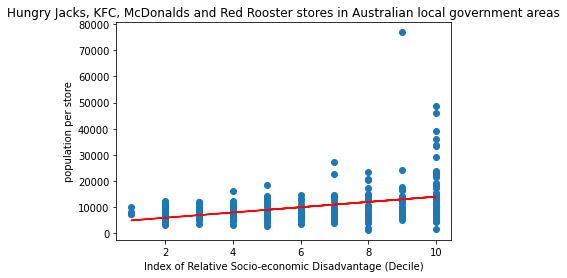

In [158]:
x = data_with_stores["Index of Relative Socio-economic Disadvantage (Decile)"]
y = data_with_stores["population per store"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
chart = plt
chart.plot(x, y, 'o', label='original data')
chart.plot(x, intercept + slope*x, 'r', label='fitted line')
chart.title("Hungry Jacks, KFC, McDonalds and Red Rooster stores in Australian local government areas")
chart.axes().set_xlabel("Index of Relative Socio-economic Disadvantage (Decile)")
chart.axes().set_ylabel("population per store")

In [159]:
print("correlation coefficient: ", r_value)
print("gradient: ", slope)

correlation coefficient:  0.3590482623430401
gradient:  1006.7398451835081


Text(0, 0.5, 'population per store')

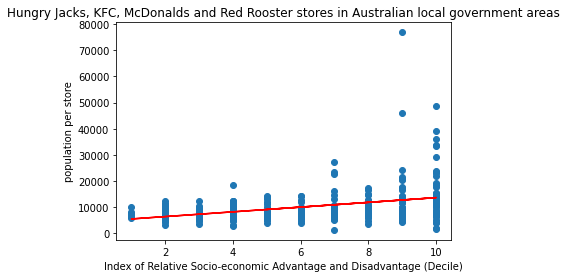

In [160]:
x = data_with_stores["Index of Relative Socio-economic Advantage and Disadvantage (Decile)"]
y = data_with_stores["population per store"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
chart = plt
chart.plot(x, y, 'o', label='original data')
chart.plot(x, intercept + slope*x, 'r', label='fitted line')
chart.title("Hungry Jacks, KFC, McDonalds and Red Rooster stores in Australian local government areas")
chart.axes().set_xlabel("Index of Relative Socio-economic Advantage and Disadvantage (Decile)")
chart.axes().set_ylabel("population per store")

In [161]:
print("correlation coefficient: ", r_value)
print("gradient: ", slope)

correlation coefficient:  0.33831345312938926
gradient:  904.542929874132


Text(0, 0.5, 'population per store')

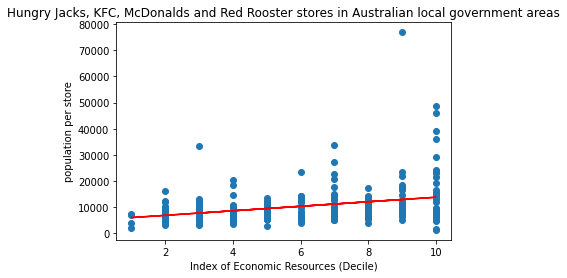

In [162]:
x = data_with_stores["Index of Economic Resources (Decile)"]
y = data_with_stores["population per store"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
chart = plt
chart.plot(x, y, 'o', label='original data')
chart.plot(x, intercept + slope*x, 'r', label='fitted line')
chart.title("Hungry Jacks, KFC, McDonalds and Red Rooster stores in Australian local government areas")
chart.axes().set_xlabel("Index of Economic Resources (Decile)")
chart.axes().set_ylabel("population per store")

In [163]:
print("correlation coefficient: ", r_value)
print("gradient: ", slope)

correlation coefficient:  0.3103759246261879
gradient:  863.4581807504633


Text(0, 0.5, 'population per store')

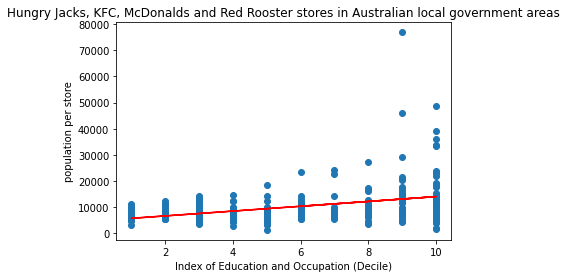

In [164]:
x = data_with_stores["Index of Education and Occupation (Decile)"]
y = data_with_stores["population per store"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
chart = plt
chart.plot(x, y, 'o', label='original data')
chart.plot(x, intercept + slope*x, 'r', label='fitted line')
chart.title("Hungry Jacks, KFC, McDonalds and Red Rooster stores in Australian local government areas")
chart.axes().set_xlabel("Index of Education and Occupation (Decile)")
chart.axes().set_ylabel("population per store")

In [165]:
print("correlation coefficient: ", r_value)
print("gradient: ", slope)

correlation coefficient:  0.36034299080239673
gradient:  921.186719013725


In [166]:
# Looks pretty similar across all the indexes, with similar gradients and correlation coefficients
# Let's see if individual restaurant chains are different

data_with_hungry_jacks_stores = joined_data[joined_data["Hungry Jacks"] != 0]
data_with_hungry_jacks_stores["population per store"] = data_with_stores["Usual Resident Population"] / data_with_stores["Hungry Jacks"]

data_with_kfc_stores = joined_data[joined_data["KFC"] != 0]
data_with_kfc_stores["population per store"] = data_with_stores["Usual Resident Population"] / data_with_stores["KFC"]

data_with_mcdonalds_stores = joined_data[joined_data["McDonalds"] != 0]
data_with_mcdonalds_stores["population per store"] = data_with_stores["Usual Resident Population"] / data_with_stores["McDonalds"]

data_with_red_rooster_stores = joined_data[joined_data["Red Rooster"] != 0]
data_with_red_rooster_stores["population per store"] = data_with_stores["Usual Resident Population"] / data_with_stores["Red Rooster"]

Text(0, 0.5, 'population per store')

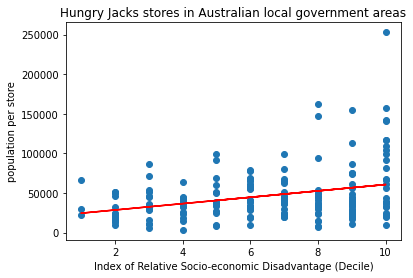

In [167]:
x = data_with_hungry_jacks_stores["Index of Relative Socio-economic Disadvantage (Decile)"]
y = data_with_hungry_jacks_stores["population per store"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
chart = plt
chart.plot(x, y, 'o', label='original data')
chart.plot(x, intercept + slope*x, 'r', label='fitted line')
chart.title("Hungry Jacks stores in Australian local government areas")
chart.axes().set_xlabel("Index of Relative Socio-economic Disadvantage (Decile)")
chart.axes().set_ylabel("population per store")

In [168]:
print("correlation coefficient: ", r_value)
print("gradient: ", slope)

correlation coefficient:  0.31047936741049953
gradient:  4016.105159924148


Text(0, 0.5, 'population per store')

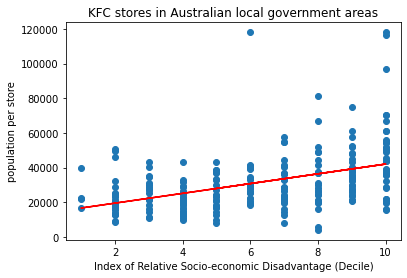

In [169]:
x = data_with_kfc_stores["Index of Relative Socio-economic Disadvantage (Decile)"]
y = data_with_kfc_stores["population per store"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
chart = plt
chart.plot(x, y, 'o', label='original data')
chart.plot(x, intercept + slope*x, 'r', label='fitted line')
chart.title("KFC stores in Australian local government areas")
chart.axes().set_xlabel("Index of Relative Socio-economic Disadvantage (Decile)")
chart.axes().set_ylabel("population per store")

In [170]:
print("correlation coefficient: ", r_value)
print("gradient: ", slope)

correlation coefficient:  0.43161543597907664
gradient:  2815.4005891571464


Text(0, 0.5, 'population per store')

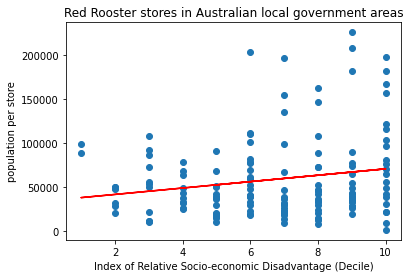

In [171]:
x = data_with_red_rooster_stores["Index of Relative Socio-economic Disadvantage (Decile)"]
y = data_with_red_rooster_stores["population per store"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
chart = plt
chart.plot(x, y, 'o', label='original data')
chart.plot(x, intercept + slope*x, 'r', label='fitted line')
chart.title("Red Rooster stores in Australian local government areas")
chart.axes().set_xlabel("Index of Relative Socio-economic Disadvantage (Decile)")
chart.axes().set_ylabel("population per store")

In [172]:
print("correlation coefficient: ", r_value)
print("gradient: ", slope)

correlation coefficient:  0.19114810397244672
gradient:  3631.4332004801895


Text(0, 0.5, 'population per store')

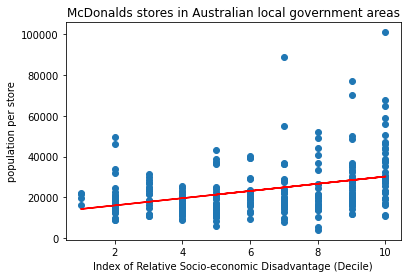

In [173]:
x = data_with_mcdonalds_stores["Index of Relative Socio-economic Disadvantage (Decile)"]
y = data_with_mcdonalds_stores["population per store"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
chart = plt
chart.plot(x, y, 'o', label='original data')
chart.plot(x, intercept + slope*x, 'r', label='fitted line')
chart.title("McDonalds stores in Australian local government areas")
chart.axes().set_xlabel("Index of Relative Socio-economic Disadvantage (Decile)")
chart.axes().set_ylabel("population per store")

In [140]:
print("correlation coefficient: ", r_value)
print("gradient: ", slope)

correlation coefficient:  0.35325901125394654
gradient:  1766.2734047965134
